# Import data

In [ ]:
import pandas as pd
sales=pd.read_csv("data_processed.csv")
sales

,week,sku,weekly_sales,price,price-1,price-2,feat_main_page,trend,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,functionality_02.Portable smartphone chargers,functionality_03.Bluetooth speakers,functionality_04.Selfie sticks,functionality_05.Bluetooth tracker,functionality_06.Mobile phone accessories,functionality_07.Headphones,functionality_08.Digital pencils,functionality_09.Smartphone stands,functionality_10.VR headset,functionality_11.Fitness trackers,functionality_12.Flash drives,color_blue,color_gold,color_green,color_grey,color_none,color_pink,color_purple,color_red,color_white,vendor_2,vendor_3,vendor_4,vendor_5,vendor_6,vendor_7,vendor_8,vendor_9,vendor_10
0,2016-11-14,1,110.0,10.24,9.86,10.16,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2016-11-21,1,127.0,8.27,10.24,9.86,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,2016-11-28,1,84.0,8.83,8.27,10.24,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,2016-12-05,1,87.0,8.98,8.83,8.27,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,2016-12-12,1,64.0,10.40,8.98,8.83,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4307,2018-08-27,44,20.0,53.99,42.38,43.99,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4308,2018-09-03,44,14.0,52.99,53.99,42.38,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4309,2018-09-10,44,22.0,44.99,52.99,53.99,1,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4310,2018-09-17,44,28.0,42.99,44.99,52.99,1,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
sales.head(5)

,week,sku,weekly_sales,price,price-1,price-2,feat_main_page,trend,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,functionality_02.Portable smartphone chargers,functionality_03.Bluetooth speakers,functionality_04.Selfie sticks,functionality_05.Bluetooth tracker,functionality_06.Mobile phone accessories,functionality_07.Headphones,functionality_08.Digital pencils,functionality_09.Smartphone stands,functionality_10.VR headset,functionality_11.Fitness trackers,functionality_12.Flash drives,color_blue,color_gold,color_green,color_grey,color_none,color_pink,color_purple,color_red,color_white,vendor_2,vendor_3,vendor_4,vendor_5,vendor_6,vendor_7,vendor_8,vendor_9,vendor_10
0,2016-11-14,1,110.0,10.24,9.86,10.16,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2016-11-21,1,127.0,8.27,10.24,9.86,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,2016-11-28,1,84.0,8.83,8.27,10.24,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,2016-12-05,1,87.0,8.98,8.83,8.27,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,2016-12-12,1,64.0,10.40,8.98,8.83,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


# II/Common Demand Prediction Methods

## 1) Primer: Preidicting the sales of one SKU

In [ ]:
import numpy as np
data = sales[sales.sku==11].sort_values(by=["week"])
colnames = [i for i in data.columns if i not in ["week","weekly_sales","sku"]]
data

X_primer = data[colnames]
y_primer = data.weekly_sales

X_train_primer,X_test_primer = np.split(X_primer, [68])
y_train_primer, y_test_primer = np.split(y_primer, [68])

In [ ]:
from statsmodels.regression.linear_model import OLS
model = OLS(y_train_primer, X_train_primer)
model = model.fit()
y_pred_primer = list(model.predict(X_test_primer))

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
print('Out of sample R2:',round(r2_score(y_test_primer, np.array(y_pred_primer)),3))
print('OOS MSE:', round(mean_squared_error(y_test_primer, np.array(y_pred_primer)),3))

Out of sample R2: 0.309
OOS MSE: 3725.488


In [ ]:
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           weekly_sales   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     1.146
Date:                Thu, 24 Jun 2021   Prob (F-statistic):              0.341
Time:                        21:13:06   Log-Likelihood:                -347.93
No. Observations:                  68   AIC:                             729.9
Df Residuals:                      51   BIC:                             767.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
price                                            -6.3585      5.101     -1.246      0.218     -16.600       3.883
price-1                                          -2.6766      4.959     -0.540      0.592     -12.632       7.278
price-2                                          -0.0394      5.243     -0.008      0.994     -10.565      10.486
feat_main_page                                   57.1821     55.359      1.033      0.307     -53.956     168.320
trend                                             8.9827     25.592      0.351      0.727     -42.395      60.360
month_2                                           0.1949     23.212      0.008      0.993     -46.405      46.795
month_3                                          -1.6325     29.119     -0.056      0.956     -60.092      56.827
month_4                                          -2.5643     29.104     -0.088      0.930     -60.992      55.864
month_5                                          49.2490     26.871      1.833      0.073      -4.697     103.195
month_6                                          23.2112     29.114      0.797      0.429     -35.237      81.659
month_7                                          36.0638     36.560      0.986      0.329     -37.334     109.461
month_8                                         -10.4372     60.504     -0.173      0.864    -131.903     111.029
month_9                                         -20.6198     41.856     -0.493      0.624    -104.650      63.410
month_10                                         11.4963     32.986      0.349      0.729     -54.725      77.718
month_11                                          8.0671     34.848      0.231      0.818     -61.892      78.027
month_12                                          6.2266     41.511      0.150      0.881     -77.109      89.562
functionality_02.Portable smartphone chargers          0          0        nan        nan           0           0
functionality_03.Bluetooth speakers                    0          0        nan        nan           0           0
functionality_04.Selfie sticks                         0          0        nan        nan           0           0
functionality_05.Bluetooth tracker                     0          0        nan        nan           0           0
functionality_06.Mobile phone accessories              0          0        nan        nan           0           0
functionality_07.Headphones                            0          0        nan        nan           0           0
functionality_08.Digital pencils                       0          0        nan        nan           0           0
functionality_09.Smartphone stands                     0          0        nan        nan           0           0
funct

In [ ]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
print(scaler.fit(X_train_primer[['price','price-1','price-2']]))
X_train_primer_price_std = scaler.transform(X_train_primer[['price','price-1','price-2']])

StandardScaler(copy=True, with_mean=True, with_std=True)


## 2) Structuring dataset 

In [ ]:
skuSet = list(sales.sku.unique())
skuData = {}
colnames = [i for i in sales.columns if i not in ["week","weekly_sales","sku"]]
for i in skuSet:
  df_i = sales[sales.sku == i]
  skuData[i] = {'X': df_i[colnames].values,
                'y': df_i.weekly_sales.values}

In [ ]:
X_dict = {}
y_dict = {}

y_test = []
y_train = []

for i in skuSet:
  
  X_train_i,X_test_i = np.split(skuData[i]["X"], [68]) #split for X
  y_train_i,y_test_i = np.split(skuData[i]["y"], [68]) #split for y 

  X_dict[i] = {'train': X_train_i, 'test': X_test_i} #filling dictionary
  y_dict[i] = {'train': y_train_i, 'test': y_test_i}

  y_test += list(y_test_i) 
  y_train += list(y_train_i) 


## 3) Centralized 

In [ ]:
import time
tZero=time.time()

X_cen_train = X_dict[skuSet[0]]['train'] #initialization with item 0
X_cen_test = X_dict[skuSet[0]]['test']

for i in skuSet[1:]: #Iteration over items
    X_cen_train = np.concatenate((X_cen_train, X_dict[i]['train']), axis = 0) #Bringing together the training set
    X_cen_test = np.concatenate((X_cen_test, X_dict[i]['test']), axis = 0)

from sklearn.linear_model import LinearRegression
model_cen = LinearRegression().fit(X_cen_train, y_train)

from sklearn.metrics import r2_score, mean_squared_error
print('OOS R2:', round(r2_score(y_test, model_cen.predict(X_cen_test)),3))  
print('OOS MSE:', round(mean_squared_error(y_test, model_cen.predict(X_cen_test)),3))

t = time.time()-tZero
print("Time to compute:",round(t,3)," sec.")

OOS R2: 0.114
OOS MSE: 98086.301
Time to compute: 0.17  sec.


In [ ]:
res=pd.DataFrame(index=['R2'])
res

""
R2


In [ ]:
res['centralized']=[r2_score(y_test, model_cen.predict(X_cen_test))]
res

,centralized
R2,0.114249


## 4) Decentralized

In [ ]:
tZero=time.time()

y_pred = []
skuModels = {}

for i in skuSet:
 #one model for each item, fitted on training set
 model_i = OLS(y_dict[i]['train'], X_dict[i]['train'], hasconst = False)
 skuModels[i] = model_i.fit()

 #compute and concatenate prediction of the model i on item i
 y_pred += list(skuModels[i].predict(X_dict[i]['test']))


#computing overall performance metrics on y_pred and y_test:
print('OOS R2:',round(r2_score(y_test, np.array(y_pred)),3))
print('OOS MSE:', round(mean_squared_error(y_test, np.array(y_pred)),3))

t = time.time()-tZero
print("Time to compute:",round(t,3)," sec")

OOS R2: 0.517
OOS MSE: 53537.475
Time to compute: 0.12  sec


In [ ]:
res['decentralized']=[r2_score(y_test, np.array(y_pred))]
res

,centralized,decentralized
R2,0.114249,0.516539


## 5) Feature Selection and Regularization in the Decentralized model


### a) Subset Selection

In [ ]:
def forward_stepwise_selection(data,p,metric='aic'):
    """

    Perform selection of p features on a dataset 


    p: highest number of features used to train each model
    metric: aic (default) or bic

    Returns best trained model and list of features selected

    """

    available_features = set(data.columns)

    selected = []
    current_score, best_new_score = 1000, 1000

    overall_selected = []
    while available_features and current_score == best_new_score and len(selected)<p:

        scores_with_candidates = []
        for candidate in available_features:
            
            selected_candidates = selected.copy()
            
            selected_candidates.append(candidate)
            # print(selected_candidates)
            if metric == 'aic':
              score = OLS(y_train_primer, X_train_primer[selected_candidates]).fit().aic
            elif metric == 'bic':
              score = OLS(y_train_primer, X_train_primer[selected_candidates]).fit().bic

            else:
              print('Metric not supported')
              break
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort(reverse=True)
        best_new_score, best_candidate = scores_with_candidates.pop()

        available_features.remove(best_candidate) #remove the selected feature from available features
        selected.append(best_candidate) #add it to our list of features selected

        # display results at each stage
        print(str(len(selected))+'. :',selected,best_new_score)

        if current_score > best_new_score: #if this model generates an improvement we record it

            current_score = best_new_score
            overall_selected = selected.copy()
            

    model = OLS(y_train_primer, X_train_primer[overall_selected]).fit()
    return(model,overall_selected)

In [ ]:
model,selected = forward_stepwise_selection(X_train_primer,6,'aic')

print(selected)
print(model.aic)

1. : ['vendor_10'] 718.7550022483708
2. : ['vendor_10', 'price'] 711.9902300153797
3. : ['vendor_10', 'price', 'month_5'] 709.5003738038225
4. : ['vendor_10', 'price', 'month_5', 'month_7'] 708.9123972788229
5. : ['vendor_10', 'price', 'month_5', 'month_7', 'color_blue'] 708.9123972788229
6. : ['vendor_10', 'price', 'month_5', 'month_7', 'color_blue', 'color_gold'] 708.9123972788229
['vendor_10', 'price', 'month_5', 'month_7']
708.9123972788229


In [ ]:
model = OLS(y_train_primer, X_train_primer[selected])
model = model.fit()
y_pred_primer = list(model.predict(X_test_primer[selected]))

print('OOS R2:',round(r2_score(y_test_primer, np.array(y_pred_primer)),3))
print('OOS MSE:', round(mean_squared_error(y_test_primer, np.array(y_pred_primer)),3))

OOS R2: 0.306
OOS MSE: 3740.378


In [ ]:
model,selected = forward_stepwise_selection(X_train_primer,6,'bic')

print(selected)
print(model.bic)

1. : ['vendor_10'] 720.9745099535469
2. : ['vendor_10', 'price'] 716.4292454257319
3. : ['vendor_10', 'price', 'month_5'] 716.1588969193508
4. : ['vendor_10', 'price', 'month_5', 'color_blue'] 716.1588969193508
5. : ['vendor_10', 'price', 'month_5', 'color_blue', 'color_gold'] 716.1588969193508
6. : ['vendor_10', 'price', 'month_5', 'color_blue', 'color_gold', 'color_green'] 716.1588969193508
['vendor_10', 'price', 'month_5']
716.1588969193508


In [ ]:
model = OLS(y_train_primer, X_train_primer[selected])
model = model.fit()
y_pred_primer = list(model.predict(X_test_primer[selected]))
from sklearn.metrics import r2_score, mean_squared_error
print('OOS R2:',round(r2_score(y_test_primer, np.array(y_pred_primer)),3))
print('OOS MSE:', round(mean_squared_error(y_test_primer, np.array(y_pred_primer)),3))

OOS R2: 0.327
OOS MSE: 3625.572


### b) Lasso Technique


#### i) Lasso for SKU 11

In [ ]:
from sklearn import linear_model
lasso_model = linear_model.Lasso(alpha=1.0)
lasso_model.fit(X_train_primer,y_train_primer)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
lasso_df = pd.DataFrame(list(zip(X_primer.columns,lasso_model.coef_)),columns=["feature","coefficient"])
lasso_df[lasso_df.coefficient !=0]

,feature,coefficient
0,price,-6.410044
1,price-1,-2.162840
4,trend,1.307212
8,month_5,28.733470
10,month_7,16.770163
12,month_9,-8.892590


In [ ]:
y_pred_primer = list(lasso_model.predict(X_test_primer))
print('OOS R2:',round(r2_score(y_test_primer, np.array(y_pred_primer)),3))
print('OOS MSE:', round(mean_squared_error(y_test_primer, np.array(y_pred_primer)),3))

OOS R2: 0.332
OOS MSE: 3601.29


#### ii) Decentralized Lasso

In [ ]:
tZero=time.time()

y_pred = []

skuModelsLasso = {}

for i in skuSet:
   
  model_i = linear_model.Lasso(alpha=0.1)
 
  skuModelsLasso[i] = model_i.fit(X_dict[i]["train"],y_dict[i]["train"])
  y_pred += list(skuModelsLasso[i].predict(X_dict[i]['test']))

print('OOS R2:',round(r2_score(y_test, np.array(y_pred)),3))
print('OOS MSE:', round(mean_squared_error(y_test, np.array(y_pred)),3))

t = time.time()-tZero
print("Time to compute:",round(t,3)," sec")

OOS R2: 0.523
OOS MSE: 52833.745
Time to compute: 0.058  sec


In [ ]:
res['decentralized_lasso']=[r2_score(y_test, np.array(y_pred))]
res

,centralized,decentralized,decentralized_lasso
R2,0.114249,0.516539,0.522894


### c) Ridge Technique


#### i) Ridge on SKU 11


In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1)
ridge.fit(X_train_primer, y_train_primer)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

#### ii) Decentralized Ridge

In [ ]:
tZero=time.time()

y_pred = []

skuModelsRidge = {}

for i in skuSet:
   
  model_i = Ridge(alpha=1)
 
  skuModelsRidge[i] = model_i.fit(X_dict[i]["train"],y_dict[i]["train"])
  y_pred += list(skuModelsRidge[i].predict(X_dict[i]['test']))

print('OOS R2:',round(r2_score(y_test, np.array(y_pred)),3))
print('OOS MSE:', round(mean_squared_error(y_test, np.array(y_pred)),3))

t = time.time()-tZero
print("Time to compute:",round(t,3)," sec")

OOS R2: 0.571
OOS MSE: 47518.987
Time to compute: 0.127  sec


In [ ]:
res['decentralized_ridge']=[r2_score(y_test, np.array(y_pred))]
res

,centralized,decentralized,decentralized_lasso,decentralized_ridge
R2,0.114249,0.516539,0.522894,0.570888


### d) ElasticNet Technique


#### i) ElasticNet on SKU 11

In [ ]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha= 0.05,l1_ratio=0.3)
elastic.fit(X_train_primer, y_train_primer)

ElasticNet(alpha=0.05, copy_X=True, fit_intercept=True, l1_ratio=0.3,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

#### ii) Decentralized Elastic Net

In [ ]:
tZero=time.time()

y_pred = []
skuModelsElastic = {}

for i in skuSet:
  elastic = ElasticNet(alpha= 0.05,l1_ratio=0.3)
  skuModelsElastic[i] = elastic.fit(X_dict[i]["train"],y_dict[i]["train"])
  y_pred += list(skuModelsElastic[i].predict(X_dict[i]['test']))

print('OOS R2:',round(r2_score(y_test, np.array(y_pred)),3))
print('OOS MSE:', round(mean_squared_error(y_test, np.array(y_pred)),3))

t = time.time()-tZero
print("Time to compute",round(t,3)," sec")

OOS R2: 0.585
OOS MSE: 45992.958
Time to compute 0.038  sec


In [ ]:
res['decentralized_elasticnet']=[r2_score(y_test, np.array(y_pred))]
res

,centralized,decentralized,decentralized_lasso,decentralized_ridge,decentralized_elasticnet
R2,0.114249,0.516539,0.522894,0.570888,0.584669


## 6) Log-transformations





In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
color=sns.color_palette(palette='colorblind')[3]

### a) Log-transformation on the price variables

In [ ]:
df_plots=pd.DataFrame()
df_plots['sales']=sales['weekly_sales']
df_plots['price']=sales['price']
df_plots['logprice']=np.log(sales['price'])
df_plots.head()

,sales,price,logprice
0,110.0,10.24,2.326302
1,127.0,8.27,2.112635
2,84.0,8.83,2.178155
3,87.0,8.98,2.195000
4,64.0,10.40,2.341806


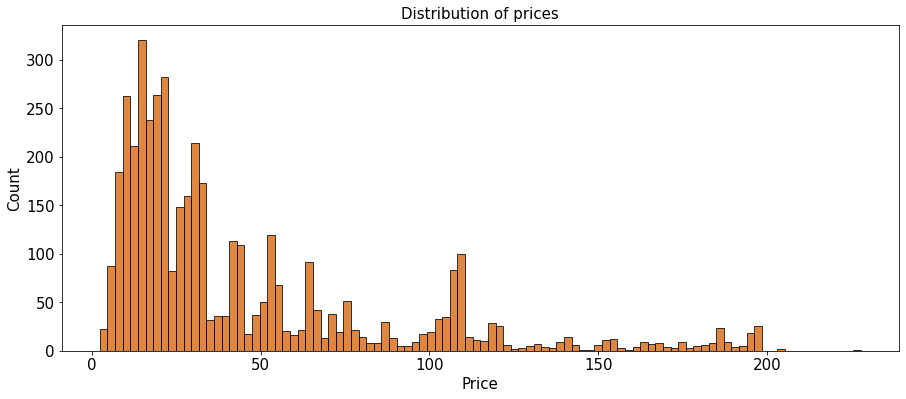

In [ ]:
plt.figure(figsize=(15,6))
plt.rcParams.update({'font.size': 15})
graph = sns.histplot(data=df_plots, x="price", bins=100, color=color)
plt.title('Distribution of prices', fontsize=15)
plt.xlabel("Price")
plt.savefig("price_distrib.png",dpi=400)
plt.show()

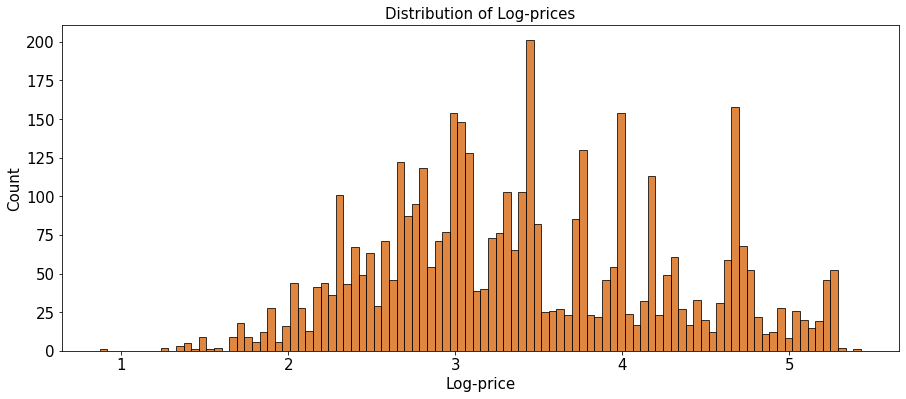

In [ ]:
plt.figure(figsize=(15,6))
plt.rcParams.update({'font.size': 15})
graph = sns.histplot(data=df_plots, x="logprice", bins=100, color=color)
plt.title('Distribution of Log-prices', fontsize=15)
plt.xlabel("Log-price")
plt.savefig("logprice_distrib.png",dpi=400)
plt.show()

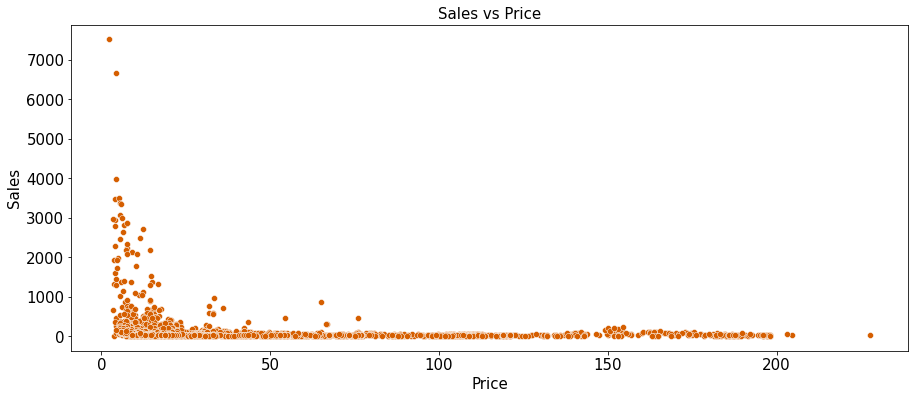

In [ ]:
plt.figure(figsize=(15,6))
plt.rcParams.update({'font.size': 15})
plt.title('Sales vs Price', fontsize=15)
sns.scatterplot(data=df_plots, x="price", y="sales", color=color)
plt.xlabel("Price")
plt.ylabel("Sales")
plt.savefig("sales_price.png",dpi=400)
plt.show()

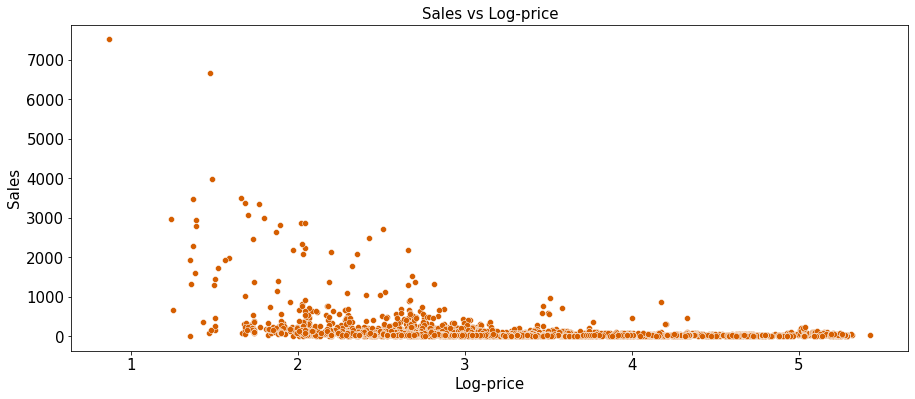

In [ ]:
plt.figure(figsize=(15,6))
plt.rcParams.update({'font.size': 15})
plt.title('Sales vs Log-price', fontsize=15)
sns.scatterplot(data=df_plots, x="logprice", y="sales", color=color)
plt.xlabel("Log-price")
plt.ylabel("Sales")
plt.savefig("sales_logprice.png",dpi=400)
plt.show()

### b) Log-transformation on the target variable

In [ ]:
df_plots['logsales']=np.log(sales['weekly_sales']+1)
df_plots.head()

,sales,price,logprice,logsales
0,110.0,10.24,2.326302,4.709530
1,127.0,8.27,2.112635,4.852030
2,84.0,8.83,2.178155,4.442651
3,87.0,8.98,2.195000,4.477337
4,64.0,10.40,2.341806,4.174387


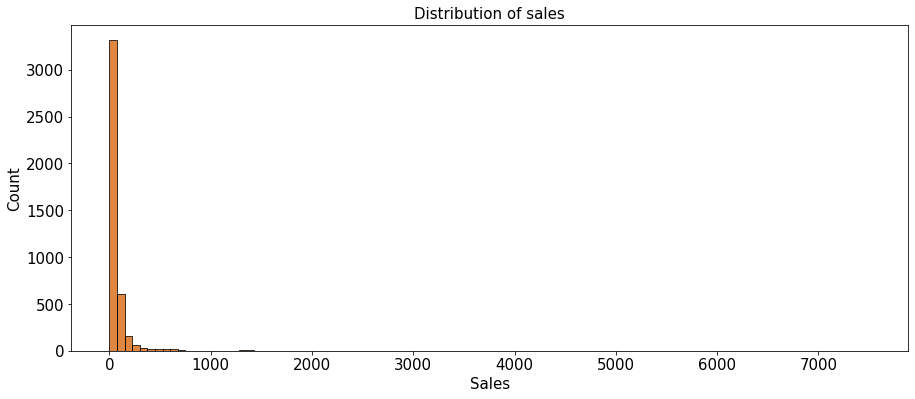

In [ ]:
plt.figure(figsize=(15,6))
plt.rcParams.update({'font.size': 15})
graph = sns.histplot(data=df_plots, x="sales", bins=100, color=color)
plt.title('Distribution of sales', fontsize=15)
plt.xlabel("Sales")
plt.savefig("sales_distrib.png",dpi=400)
plt.show()

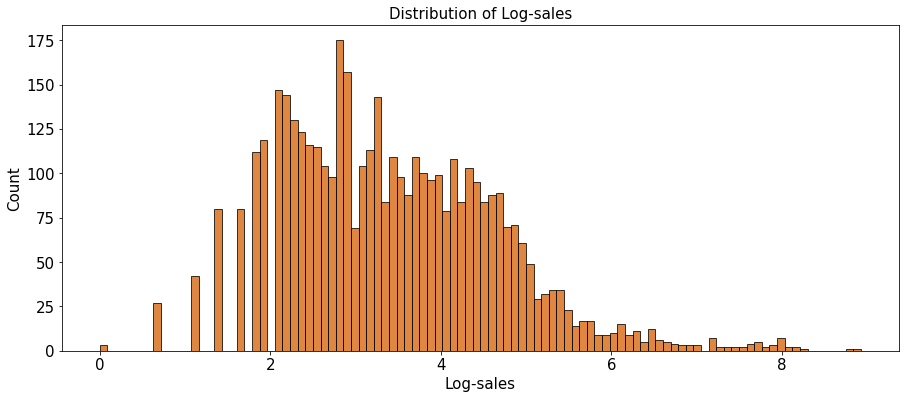

In [ ]:
plt.figure(figsize=(15,6))
plt.rcParams.update({'font.size': 15})
graph = sns.histplot(data=df_plots, x="logsales", bins=100, color=color)
plt.title('Distribution of Log-sales', fontsize=15)
plt.xlabel("Log-sales")
plt.savefig("logsales_distrib.png",dpi=400)
plt.show()

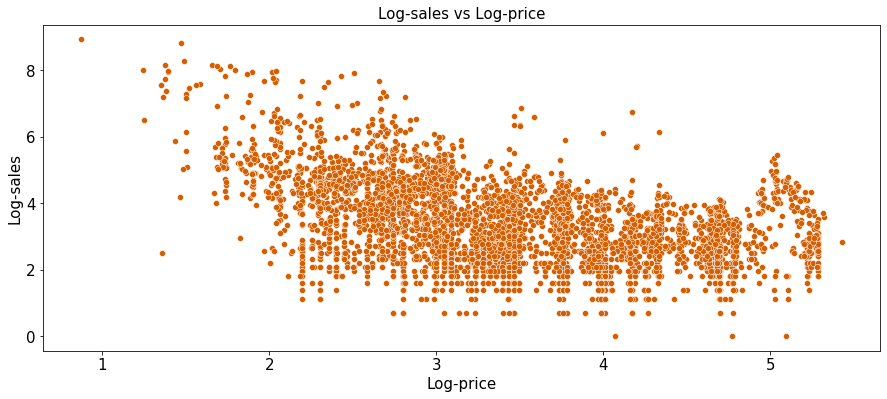

In [ ]:
plt.figure(figsize=(15,6))
plt.rcParams.update({'font.size': 15})
plt.title('Log-sales vs Log-price', fontsize=15)
sns.scatterplot(data=df_plots, x="logprice", y="logsales", color=color)
plt.xlabel("Log-price")
plt.ylabel("Log-sales")
plt.savefig("logsales_logprice.png",dpi=400)
plt.show()

### c) Applying transformations

Log-lin:

In [ ]:
sales_log_lin = sales.copy()
sales_log_lin['price']=np.log(sales_log_lin['price'])
sales_log_lin['price-1']=np.log(sales_log_lin['price-1'])
sales_log_lin['price-2']=np.log(sales_log_lin['price-2'])
sales_log_lin.head()

,week,sku,weekly_sales,price,price-1,price-2,feat_main_page,trend,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,functionality_02.Portable smartphone chargers,functionality_03.Bluetooth speakers,functionality_04.Selfie sticks,functionality_05.Bluetooth tracker,functionality_06.Mobile phone accessories,functionality_07.Headphones,functionality_08.Digital pencils,functionality_09.Smartphone stands,functionality_10.VR headset,functionality_11.Fitness trackers,functionality_12.Flash drives,color_blue,color_gold,color_green,color_grey,color_none,color_pink,color_purple,color_red,color_white,vendor_2,vendor_3,vendor_4,vendor_5,vendor_6,vendor_7,vendor_8,vendor_9,vendor_10
0,2016-11-14,1,110.0,2.326302,2.288486,2.318458,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2016-11-21,1,127.0,2.112635,2.326302,2.288486,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,2016-11-28,1,84.0,2.178155,2.112635,2.326302,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,2016-12-05,1,87.0,2.195000,2.178155,2.112635,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,2016-12-12,1,64.0,2.341806,2.195000,2.178155,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
skuSet = list(sales.sku.unique()) #the SKU numbers do not change
skuData = {}
colnames = [i for i in sales.columns if i not in ["week","weekly_sales","sku"]] 
for i in skuSet:
  df_i = sales_log_lin[sales_log_lin.sku == i]
  skuData[i] = {'X': df_i[colnames].values,
                'y': df_i.weekly_sales.values}

In [ ]:
# testing data dictionary
X_dict = {}
y_dict = {}

skuModels = {}
y_pred = []
y_test = []
y_train = []

for i in skuSet:

    X_train_i,X_test_i = np.split(skuData[i]["X"], [68])
    y_train_i,y_test_i = np.split(skuData[i]["y"], [68])

    X_dict[i] = {'train': X_train_i, 'test': X_test_i}
    y_dict[i] = {'train': y_train_i, 'test': y_test_i}
    
    model_i = OLS(y_train_i, X_train_i)
    skuModels[i] = model_i.fit()
    y_pred += list(skuModels[i].predict(X_test_i))

    y_test += list(y_test_i)
    y_train += list(y_train_i)

y_train = np.array(y_train)
y_test = np.array(y_test)

print('OOS R2:',round(r2_score(y_test, np.array(y_pred)),3))

OOS R2: 0.558


In [ ]:
res['decentralized_log_lin']=[r2_score(y_test, np.array(y_pred))]
res

,centralized,decentralized,decentralized_lasso,decentralized_ridge,decentralized_elasticnet,decentralized_log_lin
R2,0.114249,0.516539,0.522894,0.570888,0.584669,0.558297


Log-log:

In [ ]:
sales_log_log = sales.copy()
sales_log_log['price']=np.log(sales_log_log['price'])
sales_log_log['price-1']=np.log(sales_log_log['price-1'])
sales_log_log['price-2']=np.log(sales_log_log['price-2'])
sales_log_log['weekly_sales']=np.log(sales_log_log['weekly_sales']+1)
sales_log_log.head()

,week,sku,weekly_sales,price,price-1,price-2,feat_main_page,trend,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,functionality_02.Portable smartphone chargers,functionality_03.Bluetooth speakers,functionality_04.Selfie sticks,functionality_05.Bluetooth tracker,functionality_06.Mobile phone accessories,functionality_07.Headphones,functionality_08.Digital pencils,functionality_09.Smartphone stands,functionality_10.VR headset,functionality_11.Fitness trackers,functionality_12.Flash drives,color_blue,color_gold,color_green,color_grey,color_none,color_pink,color_purple,color_red,color_white,vendor_2,vendor_3,vendor_4,vendor_5,vendor_6,vendor_7,vendor_8,vendor_9,vendor_10
0,2016-11-14,1,4.709530,2.326302,2.288486,2.318458,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2016-11-21,1,4.852030,2.112635,2.326302,2.288486,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,2016-11-28,1,4.442651,2.178155,2.112635,2.326302,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,2016-12-05,1,4.477337,2.195000,2.178155,2.112635,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,2016-12-12,1,4.174387,2.341806,2.195000,2.178155,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
skuSet = list(sales.sku.unique()) #the SKU numbers do not change
skuData = {}
colnames = [i for i in sales.columns if i not in ["week","weekly_sales","sku"]] #the names of columns do not change
for i in skuSet:
  df_i = sales_log_log[sales_log_log.sku == i]
  skuData[i] = {'X': df_i[colnames].values,
                'y': df_i.weekly_sales.values}

In [ ]:
# testing data dictionary
X_dict = {}
y_dict = {}

skuModels = {}
y_pred_log = []
y_train_log = []
y_test_log = []

for i in skuSet:

    X_train_i,X_test_i = np.split(skuData[i]["X"], [68])
    y_train_i,y_test_i = np.split(skuData[i]["y"], [68])

    X_dict[i] = {'train': X_train_i, 'test': X_test_i}
    y_dict[i] = {'train': y_train_i, 'test': y_test_i}
    
    model_i = OLS(y_train_i, X_train_i, hasconst = False)
    skuModels[i] = model_i.fit()

    y_pred_log += list(skuModels[i].predict(X_test_i))
    y_train_log += list(y_train_i)
    y_test_log += list(y_test_i)

y_train = np.array(y_train)
## Don’t forget to take the exponential of the predicted values
y_pred=np.exp(y_pred_log)-1
y_test=np.exp(y_test_log)-1
## Then compute the R2
print('OOS R2:',r2_score(y_test, np.array(y_pred)))

OOS R2: 0.19968941829716413


In [ ]:
res['decentralized_log_log']=[r2_score(y_test, np.array(y_pred))]
res

,centralized,decentralized,decentralized_lasso,decentralized_ridge,decentralized_elasticnet,decentralized_log_lin,decentralized_log_log
R2,0.114249,0.516539,0.522894,0.570888,0.584669,0.558297,0.199689


## 7) Centralized with SKU fixed effects

In [ ]:
sales_fe_sku = sales.copy()
sales_fe_sku = pd.get_dummies(data=sales_fe_sku, columns=['sku'])
sales_fe_sku["sku"] = sales["sku"] 
sales_fe_sku.head(5)

,week,weekly_sales,price,price-1,price-2,feat_main_page,trend,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,functionality_02.Portable smartphone chargers,functionality_03.Bluetooth speakers,functionality_04.Selfie sticks,functionality_05.Bluetooth tracker,functionality_06.Mobile phone accessories,functionality_07.Headphones,functionality_08.Digital pencils,functionality_09.Smartphone stands,functionality_10.VR headset,functionality_11.Fitness trackers,functionality_12.Flash drives,color_blue,color_gold,color_green,color_grey,color_none,color_pink,color_purple,color_red,color_white,vendor_2,vendor_3,...,sku_6,sku_7,sku_8,sku_9,sku_10,sku_11,sku_12,sku_13,sku_14,sku_15,sku_16,sku_17,sku_18,sku_19,sku_20,sku_21,sku_22,sku_23,sku_24,sku_25,sku_26,sku_27,sku_28,sku_29,sku_30,sku_31,sku_32,sku_33,sku_34,sku_35,sku_36,sku_37,sku_38,sku_39,sku_40,sku_41,sku_42,sku_43,sku_44,sku
0,2016-11-14,110.0,10.24,9.86,10.16,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2016-11-21,127.0,8.27,10.24,9.86,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2016-11-28,84.0,8.83,8.27,10.24,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2016-12-05,87.0,8.98,8.83,8.27,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2016-12-12,64.0,10.40,8.98,8.83,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
skuSet = list(sales_fe_sku.sku.unique()) #the SKU numbers do not change
skuData = {}
colnames = [i for i in sales_fe_sku.columns if i not in ["week","weekly_sales","sku"]]
for i in skuSet:
  df_i = sales_fe_sku[sales_fe_sku.sku == i]
  skuData[i] = {'X': df_i[colnames].values,
                'y': df_i.weekly_sales.values}

In [ ]:
X_dict = {}
y_dict = {}

y_test = []
y_train = []

for i in skuSet:
  
  X_train_i,X_test_i = np.split(skuData[i]["X"], [68]) #split for X
  y_train_i,y_test_i = np.split(skuData[i]["y"], [68]) #split for y 

  X_dict[i] = {'train': X_train_i, 'test': X_test_i} #filling dictionary
  y_dict[i] = {'train': y_train_i, 'test': y_test_i}

  y_test += list(y_test_i) 
  y_train += list(y_train_i) 

In [ ]:
import time
tZero=time.time()

X_cen_train = X_dict[skuSet[0]]['train'] #initialization with item 0
X_cen_test = X_dict[skuSet[0]]['test']

for i in skuSet[1:]: #Iteration over items
    X_cen_train = np.concatenate((X_cen_train, X_dict[i]['train']), axis = 0) #Bringing together the training set
    X_cen_test = np.concatenate((X_cen_test, X_dict[i]['test']), axis = 0)

model_cen = LinearRegression().fit(X_cen_train, y_train)
print('OOS R2:', round(r2_score(y_test, model_cen.predict(X_cen_test)),3))  
print('MSE:', round(mean_squared_error(y_test, model_cen.predict(X_cen_test)),3))

t = time.time()-tZero
print("Time to compute:",round(t,3)," sec")

OOS R2: 0.298
MSE: 77763.005
Time to compute: 0.052  sec


In [ ]:
fixed_effect_sku = pd.DataFrame(zip(colnames,model_cen.coef_),columns=["feature","coef"])
fixed_effect_sku

,feature,coef
0,price,-1.705274e+00
1,price-1,-1.654425e-01
2,price-2,8.655263e-01
3,feat_main_page,6.151598e+01
4,trend,-1.885188e+00
...,...,...
84,sku_40,-4.387632e+11
85,sku_41,-2.107223e+12
86,sku_42,-4.980420e+11
87,sku_43,1.231925e+12


In [ ]:
res['Centralized - SKU FE']=[r2_score(y_test, model_cen.predict(X_cen_test))]
res

,centralized,decentralized,decentralized_lasso,decentralized_ridge,decentralized_elasticnet,decentralized_log_lin,decentralized_log_log,Centralized - SKU FE
R2,0.114249,0.516539,0.522894,0.570888,0.584669,0.558297,0.199689,0.297775


## 8) Centralized with price fixed effects 

In [ ]:
sales_fe_price = sales.copy()

In [ ]:
for i in range(1,45):
  sales_fe_price["price_fixed_effect_"+str(i)] = sales_fe_sku["price"]*sales_fe_sku["sku_"+str(i)]
sales_fe_price.head(5)

,week,sku,weekly_sales,price,price-1,price-2,feat_main_page,trend,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,functionality_02.Portable smartphone chargers,functionality_03.Bluetooth speakers,functionality_04.Selfie sticks,functionality_05.Bluetooth tracker,functionality_06.Mobile phone accessories,functionality_07.Headphones,functionality_08.Digital pencils,functionality_09.Smartphone stands,functionality_10.VR headset,functionality_11.Fitness trackers,functionality_12.Flash drives,color_blue,color_gold,color_green,color_grey,color_none,color_pink,color_purple,color_red,color_white,vendor_2,...,price_fixed_effect_5,price_fixed_effect_6,price_fixed_effect_7,price_fixed_effect_8,price_fixed_effect_9,price_fixed_effect_10,price_fixed_effect_11,price_fixed_effect_12,price_fixed_effect_13,price_fixed_effect_14,price_fixed_effect_15,price_fixed_effect_16,price_fixed_effect_17,price_fixed_effect_18,price_fixed_effect_19,price_fixed_effect_20,price_fixed_effect_21,price_fixed_effect_22,price_fixed_effect_23,price_fixed_effect_24,price_fixed_effect_25,price_fixed_effect_26,price_fixed_effect_27,price_fixed_effect_28,price_fixed_effect_29,price_fixed_effect_30,price_fixed_effect_31,price_fixed_effect_32,price_fixed_effect_33,price_fixed_effect_34,price_fixed_effect_35,price_fixed_effect_36,price_fixed_effect_37,price_fixed_effect_38,price_fixed_effect_39,price_fixed_effect_40,price_fixed_effect_41,price_fixed_effect_42,price_fixed_effect_43,price_fixed_effect_44
0,2016-11-14,1,110.0,10.24,9.86,10.16,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-11-21,1,127.0,8.27,10.24,9.86,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2016-11-28,1,84.0,8.83,8.27,10.24,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-12-05,1,87.0,8.98,8.83,8.27,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2016-12-12,1,64.0,10.40,8.98,8.83,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
sales_fe_price[sales_fe_price.sku==5][["week","sku","price_fixed_effect_5","price_fixed_effect_6"]]

,week,sku,price_fixed_effect_5,price_fixed_effect_6
392,2016-11-14,5,8.08,0.0
393,2016-11-21,5,8.99,0.0
394,2016-11-28,5,8.10,0.0
395,2016-12-05,5,6.18,0.0
396,2016-12-12,5,8.06,0.0
...,...,...,...,...
485,2018-08-27,5,10.09,0.0
486,2018-09-03,5,10.99,0.0
487,2018-09-10,5,8.99,0.0
488,2018-09-17,5,8.99,0.0


In [ ]:
sales_fe_price[sales_fe_price.sku==6][["week","sku","price_fixed_effect_5","price_fixed_effect_6"]]

,week,sku,price_fixed_effect_5,price_fixed_effect_6
490,2016-11-14,6,0.0,20.99
491,2016-11-21,6,0.0,34.18
492,2016-11-28,6,0.0,20.94
493,2016-12-05,6,0.0,19.86
494,2016-12-12,6,0.0,17.10
...,...,...,...,...
583,2018-08-27,6,0.0,41.99
584,2018-09-03,6,0.0,41.99
585,2018-09-10,6,0.0,35.22
586,2018-09-17,6,0.0,63.99


In [ ]:
skuSet = list(sales.sku.unique()) #the SKU numbers do not change
skuData = {}
colnames = [i for i in sales_fe_price.columns if i not in ["week","weekly_sales","sku","price"]] #remove price from the features

for i in skuSet:
 df_i = sales_fe_price[sales_fe_price.sku == i]
 skuData[i] = {'X': df_i[colnames].values,
               'y': df_i.weekly_sales.values}

In [ ]:
X_dict = {}
y_dict = {}

y_test = []
y_train = []

for i in skuSet:
  
  X_train_i,X_test_i = np.split(skuData[i]["X"], [68]) #split for X
  y_train_i,y_test_i = np.split(skuData[i]["y"], [68]) #split for y 

  X_dict[i] = {'train': X_train_i, 'test': X_test_i} #filling dictionary
  y_dict[i] = {'train': y_train_i, 'test': y_test_i}

  y_test += list(y_test_i) 
  y_train += list(y_train_i) 

In [ ]:
tZero=time.time()

X_cen_train = X_dict[skuSet[0]]['train'] #initialization with item 0
X_cen_test = X_dict[skuSet[0]]['test']

for i in skuSet[1:]: #Iteration over items
    X_cen_train = np.concatenate((X_cen_train, X_dict[i]['train']), axis = 0) #Bringing together the training set
    X_cen_test = np.concatenate((X_cen_test, X_dict[i]['test']), axis = 0)

model_cen = LinearRegression().fit(X_cen_train, y_train)
print('OOS R2:', round(r2_score(y_test, model_cen.predict(X_cen_test)),3))  
print('OOS MSE:', round(mean_squared_error(y_test, model_cen.predict(X_cen_test)),3))

t = time.time()-tZero
print("Time to compute:",round(t,3)," sec")

OOS R2: 0.367
OOS MSE: 70077.111
Time to compute: 0.052  sec


In [ ]:
res['Centralized - Price FE']=[r2_score(y_test, model_cen.predict(X_cen_test))]
res

,centralized,decentralized,decentralized_lasso,decentralized_ridge,decentralized_elasticnet,decentralized_log_lin,decentralized_log_log,Centralized - SKU FE,Centralized - Price FE
R2,0.114249,0.516539,0.522894,0.570888,0.584669,0.558297,0.199689,0.297775,0.367181


## 9) Centralized with SKU + price fixed effects 

In [ ]:
sales_fe_sku_price = sales_fe_sku.copy()
for i in range(1,45):
  sales_fe_sku_price["price_fixed_effect_"+str(i)] = sales_fe_sku_price["price"]*sales_fe_sku_price["sku_"+str(i)]
sales_fe_sku_price.head(5)

,week,weekly_sales,price,price-1,price-2,feat_main_page,trend,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,functionality_02.Portable smartphone chargers,functionality_03.Bluetooth speakers,functionality_04.Selfie sticks,functionality_05.Bluetooth tracker,functionality_06.Mobile phone accessories,functionality_07.Headphones,functionality_08.Digital pencils,functionality_09.Smartphone stands,functionality_10.VR headset,functionality_11.Fitness trackers,functionality_12.Flash drives,color_blue,color_gold,color_green,color_grey,color_none,color_pink,color_purple,color_red,color_white,vendor_2,vendor_3,...,price_fixed_effect_5,price_fixed_effect_6,price_fixed_effect_7,price_fixed_effect_8,price_fixed_effect_9,price_fixed_effect_10,price_fixed_effect_11,price_fixed_effect_12,price_fixed_effect_13,price_fixed_effect_14,price_fixed_effect_15,price_fixed_effect_16,price_fixed_effect_17,price_fixed_effect_18,price_fixed_effect_19,price_fixed_effect_20,price_fixed_effect_21,price_fixed_effect_22,price_fixed_effect_23,price_fixed_effect_24,price_fixed_effect_25,price_fixed_effect_26,price_fixed_effect_27,price_fixed_effect_28,price_fixed_effect_29,price_fixed_effect_30,price_fixed_effect_31,price_fixed_effect_32,price_fixed_effect_33,price_fixed_effect_34,price_fixed_effect_35,price_fixed_effect_36,price_fixed_effect_37,price_fixed_effect_38,price_fixed_effect_39,price_fixed_effect_40,price_fixed_effect_41,price_fixed_effect_42,price_fixed_effect_43,price_fixed_effect_44
0,2016-11-14,110.0,10.24,9.86,10.16,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-11-21,127.0,8.27,10.24,9.86,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2016-11-28,84.0,8.83,8.27,10.24,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-12-05,87.0,8.98,8.83,8.27,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2016-12-12,64.0,10.40,8.98,8.83,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
skuSet = list(sales.sku.unique()) #the SKU numbers do not change
skuData = {}
colnames = [i for i in sales_fe_sku_price.columns if i not in ["week","weekly_sales","sku","price"]]
for i in skuSet:
  df_i = sales_fe_sku_price[sales_fe_sku_price.sku == i]
  skuData[i] = {'X': df_i[colnames].values,
                'y': df_i.weekly_sales.values}

In [ ]:
X_dict = {}
y_dict = {}

y_test = []
y_train = []

for i in skuSet:
  
  X_train_i,X_test_i = np.split(skuData[i]["X"], [68]) #split for X
  y_train_i,y_test_i = np.split(skuData[i]["y"], [68]) #split for y 

  X_dict[i] = {'train': X_train_i, 'test': X_test_i} #filling dictionary
  y_dict[i] = {'train': y_train_i, 'test': y_test_i}

  y_test += list(y_test_i) 
  y_train += list(y_train_i) 

In [ ]:
tZero=time.time()

X_cen_train = X_dict[skuSet[0]]['train'] #initialization with item 0
X_cen_test = X_dict[skuSet[0]]['test']

for i in skuSet[1:]: #Iteration over items
    X_cen_train = np.concatenate((X_cen_train, X_dict[i]['train']), axis = 0) #Bringing together the training set
    X_cen_test = np.concatenate((X_cen_test, X_dict[i]['test']), axis = 0)

model_cen = LinearRegression(fit_intercept=True).fit(X_cen_train, y_train)
print('OOS R2:', round(r2_score(y_test, model_cen.predict(X_cen_test)),3))  
print('OOS MSE:', round(mean_squared_error(y_test, model_cen.predict(X_cen_test)),3))

t = time.time()-tZero
print("Time to compute:",round(t,3)," sec")

OOS R2: 0.58
OOS MSE: 46528.813
Time to compute: 0.069  sec


In [ ]:
pd.DataFrame(zip(colnames,model_cen.coef_),columns=["feature","coef"])

,feature,coef
0,price-1,-0.218264
1,price-2,0.818667
2,feat_main_page,7.020043
3,trend,16.808084
4,month_2,-5.520558
...,...,...
127,price_fixed_effect_40,-10.024002
128,price_fixed_effect_41,-4.358890
129,price_fixed_effect_42,0.068357
130,price_fixed_effect_43,-0.068927


In [ ]:
res['Centralized - SKU + Price FE']=[r2_score(y_test, model_cen.predict(X_cen_test))]
res

,centralized,decentralized,decentralized_lasso,decentralized_ridge,decentralized_elasticnet,decentralized_log_lin,decentralized_log_log,Centralized - SKU FE,Centralized - Price FE,Centralized - SKU + Price FE
R2,0.114249,0.516539,0.522894,0.570888,0.584669,0.558297,0.199689,0.297775,0.367181,0.57983


## 10) Decentralized Approach with Seasonality at Department Level

In [ ]:
sales_seas = sales_fe_sku.copy()

In [ ]:
sales_seas.columns

Index(['week', 'weekly_sales', 'price', 'price-1', 'price-2', 'feat_main_page',
       'trend', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'functionality_02.Portable smartphone chargers',
       'functionality_03.Bluetooth speakers', 'functionality_04.Selfie sticks',
       'functionality_05.Bluetooth tracker',
       'functionality_06.Mobile phone accessories',
       'functionality_07.Headphones', 'functionality_08.Digital pencils',
       'functionality_09.Smartphone stands', 'functionality_10.VR headset',
       'functionality_11.Fitness trackers', 'functionality_12.Flash drives',
       'color_blue', 'color_gold', 'color_green', 'color_grey', 'color_none',
       'color_pink', 'color_purple', 'color_red', 'color_white', 'vendor_2',
       'vendor_3', 'vendor_4', 'vendor_5', 'vendor_6', 'vendor_7', 'vendor_8',
       'vendor_9', 'vendor_10', 'sku_1', 'sku_2', 'sku_3', 'sku_4', 'sku_5',
  

In [ ]:
colnames_to_fix = [i for i in sales.columns if i not in ["week","weekly_sales","sku",
                                                         'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
                                                         'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12']]
colnames_to_fix

['price',
 'price-1',
 'price-2',
 'feat_main_page',
 'trend',
 'functionality_02.Portable smartphone chargers',
 'functionality_03.Bluetooth speakers',
 'functionality_04.Selfie sticks',
 'functionality_05.Bluetooth tracker',
 'functionality_06.Mobile phone accessories',
 'functionality_07.Headphones',
 'functionality_08.Digital pencils',
 'functionality_09.Smartphone stands',
 'functionality_10.VR headset',
 'functionality_11.Fitness trackers',
 'functionality_12.Flash drives',
 'color_blue',
 'color_gold',
 'color_green',
 'color_grey',
 'color_none',
 'color_pink',
 'color_purple',
 'color_red',
 'color_white',
 'vendor_2',
 'vendor_3',
 'vendor_4',
 'vendor_5',
 'vendor_6',
 'vendor_7',
 'vendor_8',
 'vendor_9',
 'vendor_10']

In [ ]:
sales_seasonality = sales_fe_sku.copy()

for feature in colnames_to_fix:
  for i in range(1,45):
    sales_seasonality[str(feature)+"_fixed_effect_"+str(i)] = sales_seasonality[feature]*sales_seasonality["sku_"+str(i)]
sales_seasonality.head(5)

,week,weekly_sales,price,price-1,price-2,feat_main_page,trend,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,functionality_02.Portable smartphone chargers,functionality_03.Bluetooth speakers,functionality_04.Selfie sticks,functionality_05.Bluetooth tracker,functionality_06.Mobile phone accessories,functionality_07.Headphones,functionality_08.Digital pencils,functionality_09.Smartphone stands,functionality_10.VR headset,functionality_11.Fitness trackers,functionality_12.Flash drives,color_blue,color_gold,color_green,color_grey,color_none,color_pink,color_purple,color_red,color_white,vendor_2,vendor_3,...,vendor_10_fixed_effect_5,vendor_10_fixed_effect_6,vendor_10_fixed_effect_7,vendor_10_fixed_effect_8,vendor_10_fixed_effect_9,vendor_10_fixed_effect_10,vendor_10_fixed_effect_11,vendor_10_fixed_effect_12,vendor_10_fixed_effect_13,vendor_10_fixed_effect_14,vendor_10_fixed_effect_15,vendor_10_fixed_effect_16,vendor_10_fixed_effect_17,vendor_10_fixed_effect_18,vendor_10_fixed_effect_19,vendor_10_fixed_effect_20,vendor_10_fixed_effect_21,vendor_10_fixed_effect_22,vendor_10_fixed_effect_23,vendor_10_fixed_effect_24,vendor_10_fixed_effect_25,vendor_10_fixed_effect_26,vendor_10_fixed_effect_27,vendor_10_fixed_effect_28,vendor_10_fixed_effect_29,vendor_10_fixed_effect_30,vendor_10_fixed_effect_31,vendor_10_fixed_effect_32,vendor_10_fixed_effect_33,vendor_10_fixed_effect_34,vendor_10_fixed_effect_35,vendor_10_fixed_effect_36,vendor_10_fixed_effect_37,vendor_10_fixed_effect_38,vendor_10_fixed_effect_39,vendor_10_fixed_effect_40,vendor_10_fixed_effect_41,vendor_10_fixed_effect_42,vendor_10_fixed_effect_43,vendor_10_fixed_effect_44
0,2016-11-14,110.0,10.24,9.86,10.16,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2016-11-21,127.0,8.27,10.24,9.86,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2016-11-28,84.0,8.83,8.27,10.24,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2016-12-05,87.0,8.98,8.83,8.27,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2016-12-12,64.0,10.40,8.98,8.83,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
sales_seasonality.columns

Index(['week', 'weekly_sales', 'price', 'price-1', 'price-2', 'feat_main_page',
       'trend', 'month_2', 'month_3', 'month_4',
       ...
       'vendor_10_fixed_effect_35', 'vendor_10_fixed_effect_36',
       'vendor_10_fixed_effect_37', 'vendor_10_fixed_effect_38',
       'vendor_10_fixed_effect_39', 'vendor_10_fixed_effect_40',
       'vendor_10_fixed_effect_41', 'vendor_10_fixed_effect_42',
       'vendor_10_fixed_effect_43', 'vendor_10_fixed_effect_44'],
      dtype='object', length=1588)

In [ ]:
skuSet = list(sales.sku.unique()) #the SKU numbers do not change
skuData = {}
colnames = [i for i in sales_seasonality.columns if i not in ["week","weekly_sales","sku"] and i not in colnames_to_fix]
for i in skuSet:
  df_i = sales_seasonality[sales_seasonality.sku == i]
  skuData[i] = {'X': df_i[colnames].values,
                'y': df_i.weekly_sales.values}

In [ ]:
X_dict = {}
y_dict = {}

y_test = []
y_train = []

for i in skuSet:
  
  X_train_i,X_test_i = np.split(skuData[i]["X"], [68]) #split for X
  y_train_i,y_test_i = np.split(skuData[i]["y"], [68]) #split for y 

  X_dict[i] = {'train': X_train_i, 'test': X_test_i} #filling dictionary
  y_dict[i] = {'train': y_train_i, 'test': y_test_i}

  y_test += list(y_test_i) 
  y_train += list(y_train_i) 

In [ ]:
tZero=time.time()

X_cen_train = X_dict[skuSet[0]]['train'] #initialization with item 0
X_cen_test = X_dict[skuSet[0]]['test']

for i in skuSet[1:]: #Iteration over items
    X_cen_train = np.concatenate((X_cen_train, X_dict[i]['train']), axis = 0) #Bringing together the training set
    X_cen_test = np.concatenate((X_cen_test, X_dict[i]['test']), axis = 0)

model_cen = LinearRegression(fit_intercept=True).fit(X_cen_train, y_train)
print('OOS R2:', round(r2_score(y_test, model_cen.predict(X_cen_test)),3))  
print('OOS MSE:', round(mean_squared_error(y_test, model_cen.predict(X_cen_test)),3))

t = time.time()-tZero
print("Time to compute:",round(t,3)," sec")

OOS R2: 0.616
OOS MSE: 42516.749
Time to compute: 2.418  sec
